In [3]:
import requests
import json 

# Data displayed in https://datadashboard.health.gov.il/COVID-19


headers = {
    'Accept': 'application/json, text/plain, */*',
    'Content-Type': 'application/json',}

data = {
   "requests":[
      {
         "id":"1",
         "queryName":"infectedPerDate",
         "single":False,
         "parameters":{

         }
      }
   ]
}

response = requests.post('https://datadashboardapi.health.gov.il/api/queries/_batch', 
                         headers=headers, 
                         data=json.dumps(data))


res = response.json()

In [45]:
import pandas as pd 
import numpy as np
import scipy.optimize
import pylab


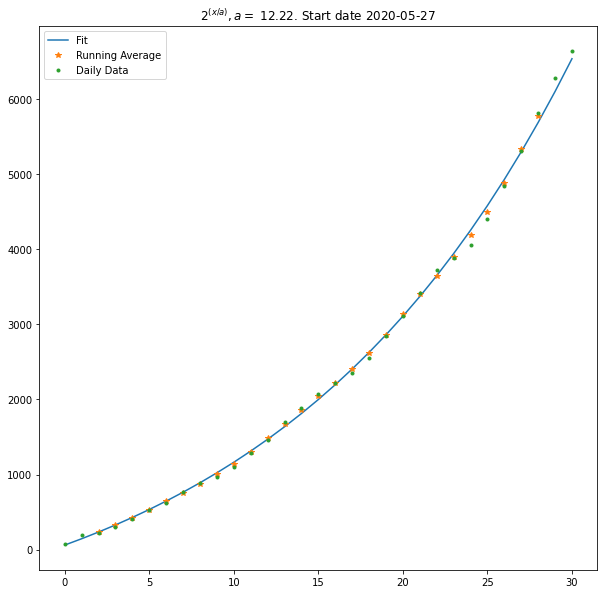

In [86]:
df = pd.DataFrame.from_records(res[0]["data"])
df["date"] = pd.to_datetime(df["date"])

second_wave_start = pd.to_datetime('2020-05-27').date()

df = df[df.date.dt.date > second_wave_start]
df.index = df.index - df.index[0] 


df["accumulated"] = df.amount.cumsum()
df["avg"] = df.accumulated.rolling(window=5, center=True).mean()

params, _ = scipy.optimize.curve_fit(lambda x, a, b, c: a * (2 ** (b*x)) + c , df.avg.dropna().index, df.avg.dropna())

pylab.figure(figsize=(10,10))
pylab.plot(df.index, params[0] * 2 ** (params[1] * df.index) + params[2], label="Fit")
pylab.plot(df.avg.dropna(), "*", label="Running Average")
pylab.plot(df.accumulated, ".", label="Daily Data")
pylab.title("$2^{(x/a)}, a=$ %.2f. Start date %s" % (1/params[1], str(second_wave_start)))
pylab.legend()

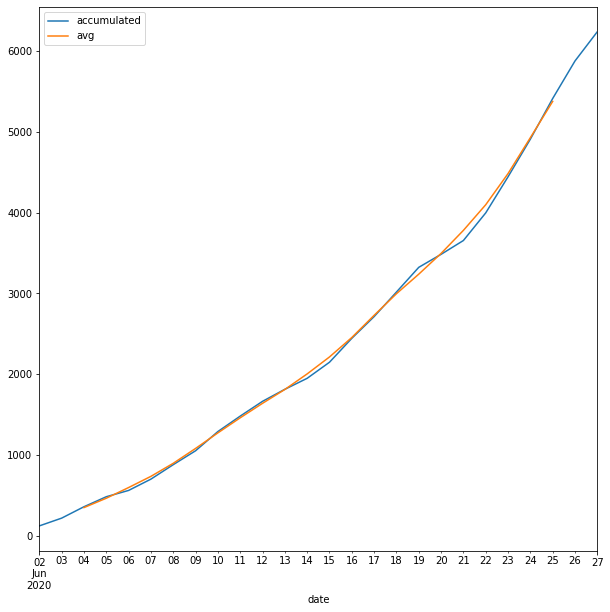

In [81]:
df.plot(x="date", y=["accumulated", "avg"], figsize=(10,10))